# Processamento de arquivos texto para SWAT
Fornece um framework para processamento de dados em arquivos texto para geração de dados utilizados na calibração e validação com SWATCUP.
Este notebook mostra um passo a passo para abrir o arquivo de texto com Pandas, processar a data, o dado da variavel e gerar o arquivo de saída com os valores formatados para swatcup.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import os

In [10]:
# Nome do arquivo de entrada e da coluna com a variavel
INPUT_FILE_NAME = './sedimentos_T_46035000.txt'    # Nome do arquivo de entrada
VARIABLE_COL = 'ConcentracaoMatSuspensao'    # Nome da coluna com os dados

# Configuracao de formatacao do arquivo de entrada
DELIMITER = ';'    # delimitator entre campos 
SKIP_ROWS = 10    # pula esse numero de linha antes de comercar a ler
ENCODING = 'iso-8859-1'    # Codificacao do arquivo. No Brasil o mais comum e iso-8859-1. Outro formato comum eh utf-8
DECIMAL = ','    # Caracter utilizado como decimal

# Gera nome do arquivo de saida a partir do de entrada. Geralmente não precisa ser alterado
path, filename = os.path.split(INPUT_FILE_NAME)
newfilename = 'swat_cal_val_{}'.format(filename)
OUTPUT_FILE_NAME = os.path.join(path, newfilename)    # Nome do arquivo de saida com dados processados para uso no SWAT
ID = filename    # Codigo identificador da estacao, para ser utilizano no comentario do dado. Serve para confirmar a origem do dado

# Periodo utilizado para calibracao (ano, mes, dia)
CALIBRATION_START_DATE = datetime.date(2003, 1, 1)
CALIBRATION_END_DATE = datetime.date(2011,1,1)
CALIBRATION_DESC = 'cal_({})'.format(ID)    # Descricao dos dados de calibracao

# Periodo utilizado para validacao
VALIDATION_START_DATE = datetime.date(2011, 1, 1)
VALIDATION_END_DATE =datetime.date(2016,1,1)
VALIDATION_DESC = 'val_({})'.format(ID)    # Descricao dos dados de calibracao

# Passo do modelo
# TODO: ainda nao esta implementado, por enquanto nao é utilizado
STEP = 'month'

## Le arquivo de entrada e transforma para formato interno

In [11]:
# Abre arquivo com pandas
df = pd.read_csv(INPUT_FILE_NAME, delimiter=DELIMITER, encoding=ENCODING, skiprows=SKIP_ROWS, index_col=False, decimal=DECIMAL)
df

,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,DataLiq,HoraLiq,NumMedicaoLiq,Cota,Vazao,AreaMolhada,Largura,VelMedia,ConcentracaoMatSuspensao,CotaDeMedicao,TemperaturaDaAgua,ConcentracaoDaAmostraExtra,CondutividadeEletrica,Observacoes
0,46035000,1,22/04/2019,01/01/1900 13:42:00,64,22/04/2019,01/01/1900 10:50:00,159.0,400,1043.000,1711.000,404.39,0.612,73.20,400.0,NaN,NaN,51.1,NaN
1,46035000,1,27/08/2018,01/01/1900 12:10:00,63,27/08/2018,NaN,NaN,221,506.000,1182.700,375.20,0.428,60.20,221.0,NaN,NaN,58.3,NaN
2,46035000,1,13/04/2018,01/01/1900 12:27:00,62,13/04/2018,01/01/1900 10:40:00,158.0,315,976.615,1703.766,449.04,0.573,73.80,315.0,NaN,NaN,82.8,NaN
3,46035000,1,20/09/2017,01/01/1900 13:20:00,61,20/09/2017,01/01/1900 11:24:00,155.0,203,450.697,1322.131,428.11,0.341,5.30,203.0,NaN,NaN,61.8,NaN
4,46035000,1,30/11/2015,01/01/1900 12:55:00,60,30/11/2015,01/01/1900 10:29:00,152.0,401,1474.900,2283.820,454.26,0.646,97.70,401.0,30.5,NaN,82.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,46035000,1,20/07/1996,01/01/1900 07:00:00,6,20/07/1996,01/01/1900 07:00:00,85.0,134,1050.000,2148.000,494.40,0.469,44.85,NaN,NaN,NaN,NaN,NaN
62,46035000,1,01/04/1996,01/01/1900 07:00:00,5,01/04/1996,01/01/1900 07:00:00,84.0,220,1629.000,2545.000,487.60,0.640,145.57,NaN,NaN,NaN,NaN,NaN
63,46035000,1,28/10/1995,01/01/1900 07:00:00,4,28/10/1995,01/01/1900 07:00:00,83.0,143,1139.000,2281.000,499.10,0.500,32.65,NaN,NaN,NaN,NaN,NaN
64,46035000,1,20/07/1995,01/01/1900 07:00:00,3,20/07/1995,01/01/1900 07:00:00,81.0,174,1237.000,2369.000,485.00,0.522,48.27,NaN,NaN,NaN,NaN,NaN


In [4]:
# Converte coluna de data de texto para formato interno
date = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Separa os dados a serem utilizados
variable = df[VARIABLE_COL]
variable.index = date
variable = variable.sort_index() # Ordena pelo indice

## Visualização dos dados parar verificação

Text(0.5, 1.0, 'ConcentracaoMatSuspensao')

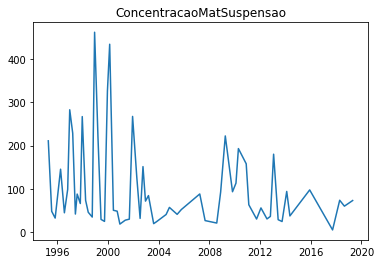

In [5]:
# Mostra gráfico para verificar se parece tudo ok
plt.plot(variable)
plt.title(VARIABLE_COL)

## Gera arquivo para SWAT

In [6]:
# Seleciona faixa de datas
calibration = pd.DataFrame(variable[CALIBRATION_START_DATE: CALIBRATION_END_DATE])
validation = pd.DataFrame(variable[VALIDATION_START_DATE: VALIDATION_END_DATE])

In [7]:
# Calcula steps e gera arquivo saida de calibração
calibration['step'] = -99
calibration['description'] = ''
for index, row in calibration.iterrows():
    year = index.year
    month = index.month
    day = index.day
    step = (year - CALIBRATION_START_DATE.year)*12 + (month - CALIBRATION_START_DATE.month) + 1
    #row['model_step'] = step
    calibration.loc[index, 'step'] = step
    calibration.loc[index, 'description'] = CALIBRATION_DESC + '_({}-{}-{})'.format(year,month,day)
    
calibration_out = calibration[['step', 'description',VARIABLE_COL]]
calibration_out.set_index('step', inplace=True)
print('Calibracao')
calibration_out

Calibracao


,description,ConcentracaoMatSuspensao
step,,
3,cal_(sedimentos_T_46035000.txt)_(2003-3-10),84.60
8,cal_(sedimentos_T_46035000.txt)_(2003-8-7),19.78
10,cal_(sedimentos_T_46035000.txt)_(2003-10-28),24.26
19,cal_(sedimentos_T_46035000.txt)_(2004-7-31),40.94
23,cal_(sedimentos_T_46035000.txt)_(2004-11-3),57.29
30,cal_(sedimentos_T_46035000.txt)_(2005-6-14),41.29
34,cal_(sedimentos_T_46035000.txt)_(2005-10-12),52.30
51,cal_(sedimentos_T_46035000.txt)_(2007-3-28),88.35
56,cal_(sedimentos_T_46035000.txt)_(2007-8-29),26.85


In [8]:
# Calcula steps e gera arquivo saida de validacao
validation['step'] = -99
validation['description'] = ''
for index, row in validation.iterrows():
    year = index.year
    month = index.month
    day = index.month
    step = (year - VALIDATION_START_DATE.year)*12 + (month - VALIDATION_START_DATE.month) + 1
    validation.loc[index, 'step'] = step
    validation.loc[index, 'description'] = VALIDATION_DESC + '_({}-{}-{})'.format(year,month,day)
    
validation_out = validation[['step', 'description','ConcentracaoMatSuspensao']]
validation_out.set_index('step', inplace=True)
print('Validacao')
validation_out

Validacao


,description,ConcentracaoMatSuspensao
step,,
2,val_(sedimentos_T_46035000.txt)_(2011-2-2),63.45
9,val_(sedimentos_T_46035000.txt)_(2011-9-9),30.47
13,val_(sedimentos_T_46035000.txt)_(2012-1-1),56.10
19,val_(sedimentos_T_46035000.txt)_(2012-7-7),30.70
22,val_(sedimentos_T_46035000.txt)_(2012-10-10),36.50
25,val_(sedimentos_T_46035000.txt)_(2013-1-1),180.20
30,val_(sedimentos_T_46035000.txt)_(2013-6-6),28.90
33,val_(sedimentos_T_46035000.txt)_(2013-9-9),24.70
38,val_(sedimentos_T_46035000.txt)_(2014-2-2),94.20


In [9]:
# Gera arquivo com valores para calibracao e validacao
with open(OUTPUT_FILE_NAME, 'w') as fo:
    fo.write('Dados de calibracao/validacao para SWAT\n')
    fo.write('Arquivo de entrada: {}\n'.format(INPUT_FILE_NAME))
    fo.write('Arquivo de saida: {}\n'.format(OUTPUT_FILE_NAME))
    fo.write('Variavel: {}\n'.format(VARIABLE_COL))
    fo.write('Passo: {}\n'.format(STEP))
    
    fo.write('\n\n')

    fo.write('Calibracao\n')
    fo.write('Data inicial: {}\n'.format(CALIBRATION_START_DATE))
    fo.write('Data final: {}\n'.format(CALIBRATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(calibration_out.index)))
    calibration_out.to_csv(fo, sep=' ')

    fo.write('\n\n')
    
    fo.write('Validacao\n')
    fo.write('Data inicial: {}\n'.format(VALIDATION_START_DATE))
    fo.write('Data final: {}\n'.format(VALIDATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(validation_out.index)))
    validation_out.to_csv(fo, sep=' ')
print('Arquivo de saida: {}'.format(OUTPUT_FILE_NAME))

Arquivo de saida: /media/jairo/SUPER FAST/Sedimentos/Jairo/Estacoes/swat_cal_val_sedimentos_T_46035000.txt
